<a href="https://colab.research.google.com/github/Kumudumali98/Simmulated-Annealing-Group-5/blob/main/Group5_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $F(x) = x^{2}$

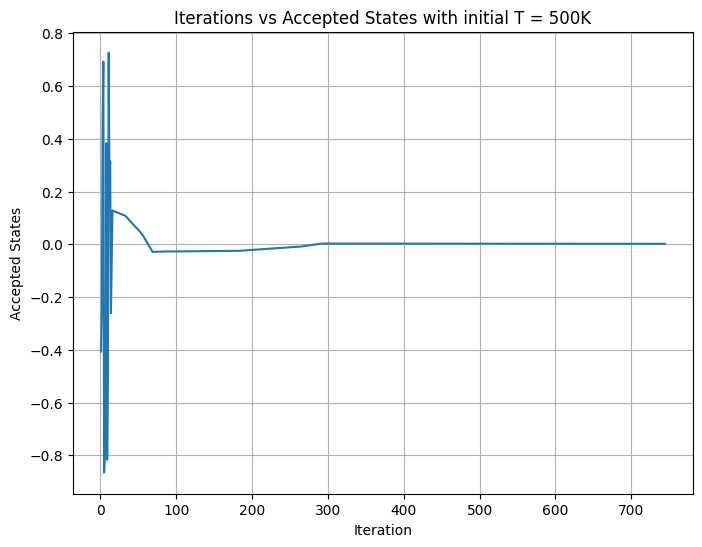

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def main():
    # Define a list of temperature values (c)
    temp = 500
    k = 0.5

    accepted_states, iteration, accepted, temperature = generate_accepted_states(temp, k)
    plot_accepted_states(iteration, accepted_states, temp)



def plot_accepted_states(iteration, accepted_states, temp):
    plt.figure(figsize=(8, 6))
    plt.plot(iteration, accepted_states)
    plt.grid()
    plt.xlabel('Iteration')
    plt.ylabel('Accepted States')
    plt.title(f'Iterations vs Accepted States with initial T = {temp}K')

def generate_accepted_states(temperature_value, k):
    # Generate data for accepted states
    state_i = np.random.uniform(-1, 1)
    accepted_states = []
    iteration = []
    accepted = []
    temperature = []

    for i in range(1, 1000):

        state_j = np.random.uniform(-1, 1)
        energy_diff = state_j**2 - state_i**2
        temperature.append(temperature_value)

        if energy_diff <= 0:  # accept state_j
            accepted_states.append(state_j)
            iteration.append(i)
            accepted.append(1)
            state_i = state_j


        else:
            if math.exp(-energy_diff / temperature_value) > np.random.uniform(0, 1):  # accept with a probability
                accepted_states.append(state_j)
                iteration.append(i)
                state_i = state_j
                accepted.append(1)

            else:
                accepted.append(0)
        temperature_value = temperature_value - temperature_value*k

    return accepted_states, iteration, accepted, temperature


main()


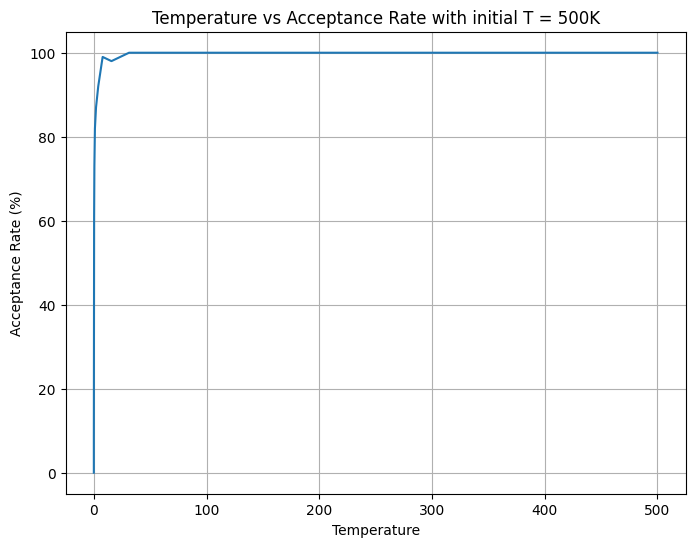

In [ ]:
def main():
    # Define parameters
    temp = 500
    k = 0.5
    num_iterations = 100

    # Initialize lists to store results
    all_accepted_states = []
    all_iteration = []
    all_accepted = []
    all_temperature = []

    max_length = 0  # Variable to track the maximum length of the lists

    for _ in range(num_iterations):
        accepted_states, iteration, accepted, temperature = generate_accepted_states(temp, k)
        # Append the lists to the main lists
        all_accepted_states.append(accepted_states)
        all_iteration.append(iteration)
        all_accepted.append(accepted)
        all_temperature.append(temperature)
        # Update the maximum length
        max_length = max(max_length, len(accepted_states), len(iteration), len(accepted), len(temperature))

    # Pad the lists with zeros to make them have the same length
    all_accepted_states = pad_lists(all_accepted_states, max_length)
    all_iteration = pad_lists(all_iteration, max_length)
    all_accepted = pad_lists(all_accepted, max_length)
    all_temperature = pad_lists(all_temperature, max_length)

    # Convert lists to numpy arrays
    all_accepted_states = np.array(all_accepted_states)
    all_iteration = np.array(all_iteration)
    all_accepted = np.array(all_accepted)
    all_temperature = np.array(all_temperature)

    # Sum the values in each index of the all_accepted array
    sum_accepted = np.sum(all_accepted, axis=0)
    acceptance_rate = (sum_accepted/num_iterations)*100
    #print("Sum of values in each index of the all_accepted array:", acceptance_rate)

    plt.figure(figsize=(8, 6))

    plt.plot(all_temperature[0], acceptance_rate)
    plt.grid()
    plt.xlabel('Temperature')
    plt.ylabel('Acceptance Rate (%)')
    plt.title(f'Temperature vs Acceptance Rate with initial T = {temp}K' )

    plt.show()


def pad_lists(lists, length):
    # Pad lists with zeros to make them have the same length
    padded_lists = [lst + [0] * (length - len(lst)) for lst in lists]
    return padded_lists

main()


# $F({x_1}, {x_2}) = 3{x_1}^2 + 5{x_2}^2 + 2$

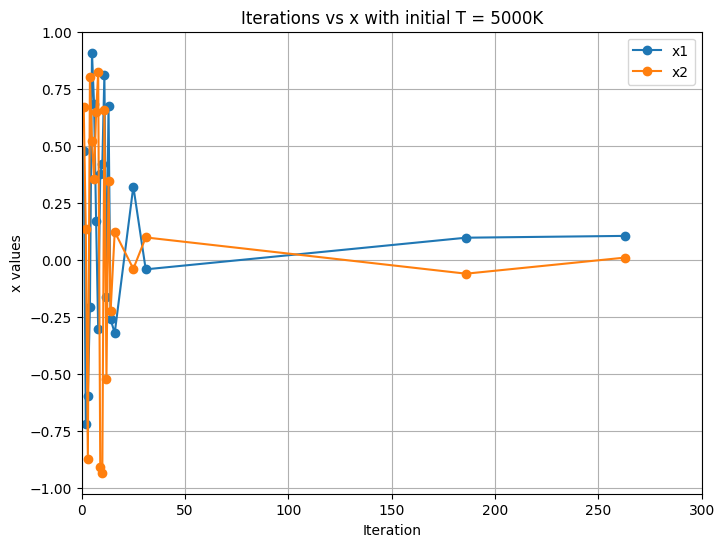

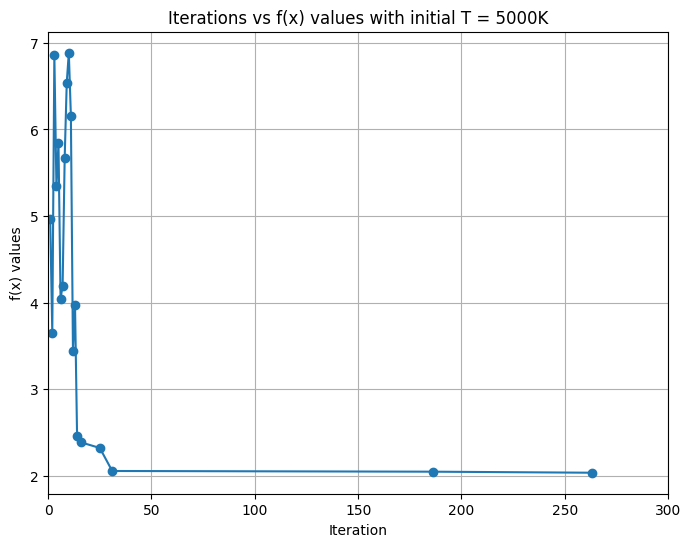

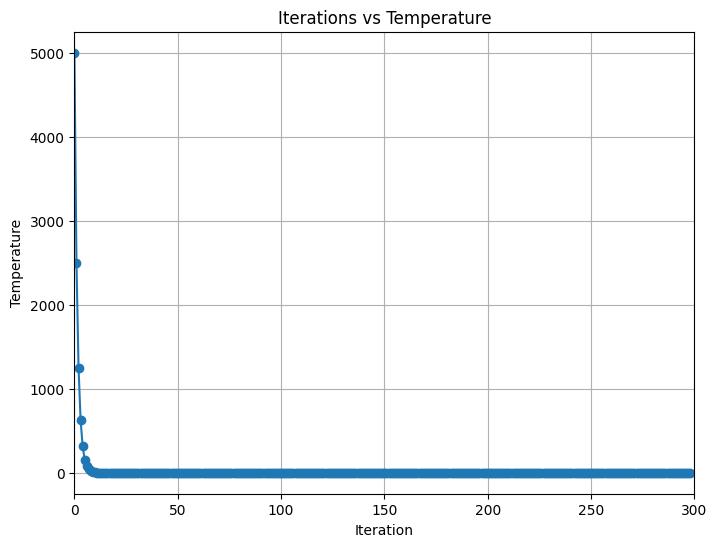

In [ ]:
def f(x):
    return 3*(x[0]**2) + 5*(x[1]**2) + 2

def main():
    # Define a list of temperature values (c)
    temp = 5000
    k = 0.5
    no_of_iterations = 300

    accepted_states_x1, accepted_states_x2, iteration, temperature, f_x_values = generate_accepted_states_v1(temp, k, no_of_iterations)


    plot_accepted_states(iteration, accepted_states_x1, accepted_states_x2, temp, no_of_iterations)
    plot_fx_values(iteration, f_x_values, temp, no_of_iterations)
    plot_temperature(temperature, no_of_iterations)


def plot_accepted_states(iteration, accepted_states_x1, accepted_states_x2, temp, no_of_iterations):
    plt.figure(figsize=(8, 6))
    plt.plot(iteration, accepted_states_x1, marker='o', label='x1')
    plt.plot(iteration, accepted_states_x2, marker='o', label='x2')
    plt.grid()
    plt.xlim(0, no_of_iterations)
    plt.legend()
    plt.xlabel('Iteration')
    plt.ylabel('x values')
    plt.title(f'Iterations vs x with initial T = {temp}K')
    plt.show()

def plot_fx_values(iteration, f_x_values_2, temp, no_of_iterations):
    plt.figure(figsize=(8, 6))
    plt.plot(iteration, f_x_values_2, marker='o')
    plt.grid()
    plt.xlim(0, no_of_iterations)
    plt.xlabel('Iteration')
    plt.ylabel('f(x) values')
    plt.title(f'Iterations vs f(x) values with initial T = {temp}K')
    plt.show()

def plot_temperature(temperature, no_of_iterations):
    plt.figure(figsize=(8, 6))
    plt.plot(temperature, marker='o')
    plt.grid()
    plt.xlim(0, no_of_iterations)
    plt.xlabel('Iteration')
    plt.ylabel('Temperature')
    plt.title('Iterations vs Temperature')
    plt.show()


def generate_accepted_states_v1(temperature_value, k, no_of_iterations):
    state_i = np.random.uniform(-1, 1, 2)
    accepted_states_x1 = []
    accepted_states_x2 = []
    iteration = []
    temperature = []
    f_x_values = []

    for i in range(1, no_of_iterations):

        state_j = np.random.uniform(-1, 1, 2)
        energy_diff = f(state_j) - f(state_i)
        temperature.append(temperature_value)

        if energy_diff <= 0:  # accept state_j
            accepted_states_x1.append(state_j[0])
            accepted_states_x2.append(state_j[1])
            f_x_values.append(f(state_j))
            iteration.append(i)
            state_i = state_j

        else:
            if math.exp(-energy_diff / temperature_value) > np.random.uniform(0, 1):  # accept with a probability
                accepted_states_x1.append(state_j[0])
                accepted_states_x2.append(state_j[1])
                f_x_values.append(f(state_j))
                iteration.append(i)
                state_i = state_j

        temperature_value = temperature_value - temperature_value*k

    return accepted_states_x1, accepted_states_x2, iteration, temperature, f_x_values

main()

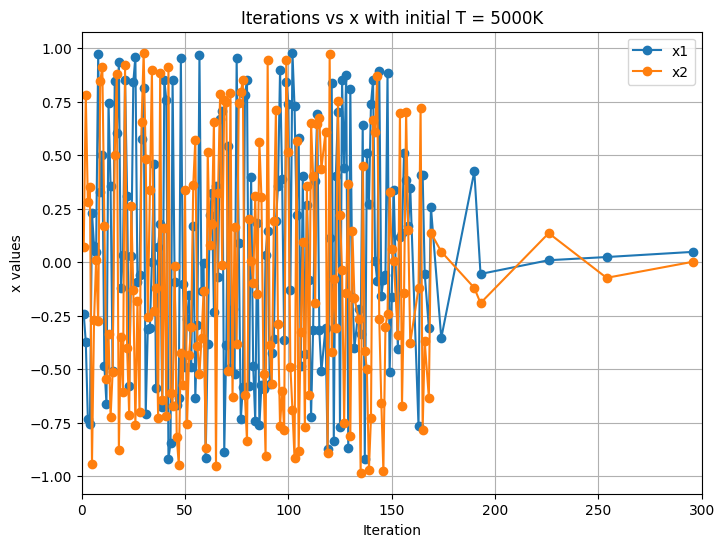

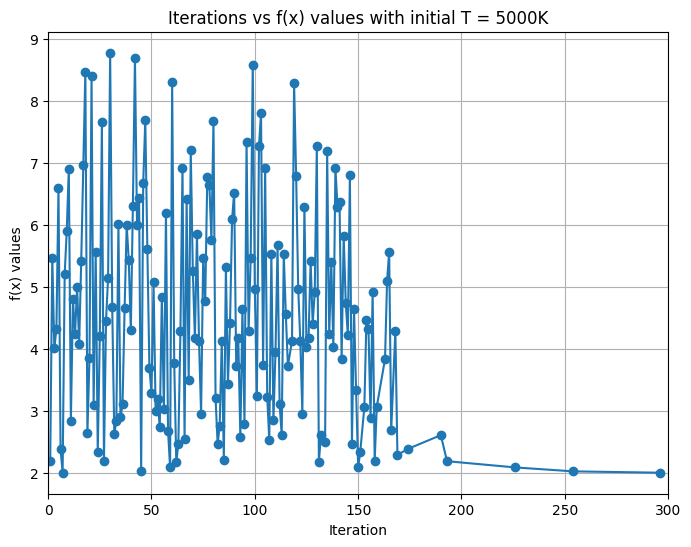

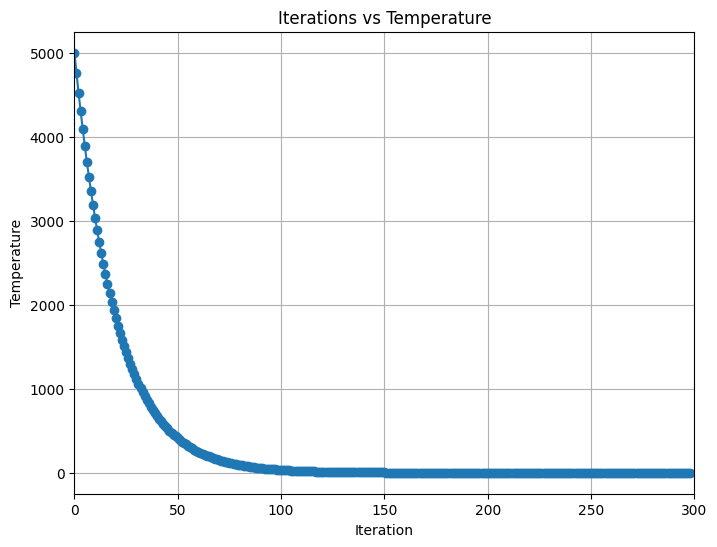

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(x):
    return 3*(x[0]**2) + 5*(x[1]**2) + 2

def main():

    temp = 5000
    k = 0.05
    no_of_iterations = 300

    accepted_states_x1, accepted_states_x2, iteration, temperature, f_x_values = generate_accepted_states_v2(temp, k, no_of_iterations)

    plot_accepted_states(iteration, accepted_states_x1, accepted_states_x2, temp, no_of_iterations)
    plot_fx_values(iteration, f_x_values, temp, no_of_iterations)
    plot_temperature(temperature, no_of_iterations)

def generate_accepted_states_v2(temperature_value, k, no_of_iterations):

    state_i = np.random.uniform(-1, 1, 2)
    accepted_states_x1 = []
    accepted_states_x2 = []
    iteration = []
    temperature = []
    f_x_values = []
    initial_temp = temperature_value

    for i in range(1, no_of_iterations):
        state_j = np.random.uniform(-1, 1, 2)
        energy_diff = f(state_j) - f(state_i)
        temperature.append(temperature_value)

        if energy_diff <= 0:  # accept state_j
            accepted_states_x1.append(state_j[0])
            accepted_states_x2.append(state_j[1])
            f_x_values.append(f(state_j))
            iteration.append(i)
            state_i = state_j
        else:
            if math.exp(-energy_diff / temperature_value) > np.random.uniform(0, 1):  # accept with a probability
                accepted_states_x1.append(state_j[0])
                accepted_states_x2.append(state_j[1])
                f_x_values.append(f(state_j))
                iteration.append(i)
                state_i = state_j

        temperature_value = initial_temp*math.exp(-k*i)

    return accepted_states_x1, accepted_states_x2, iteration, temperature, f_x_values

main()

Error between version 1 and version 2 =  0.00024205062132383836
Error between version 1 and global minium =  0.00014084115580903655
Error between version 2 and global minium =  0.000752165059521649



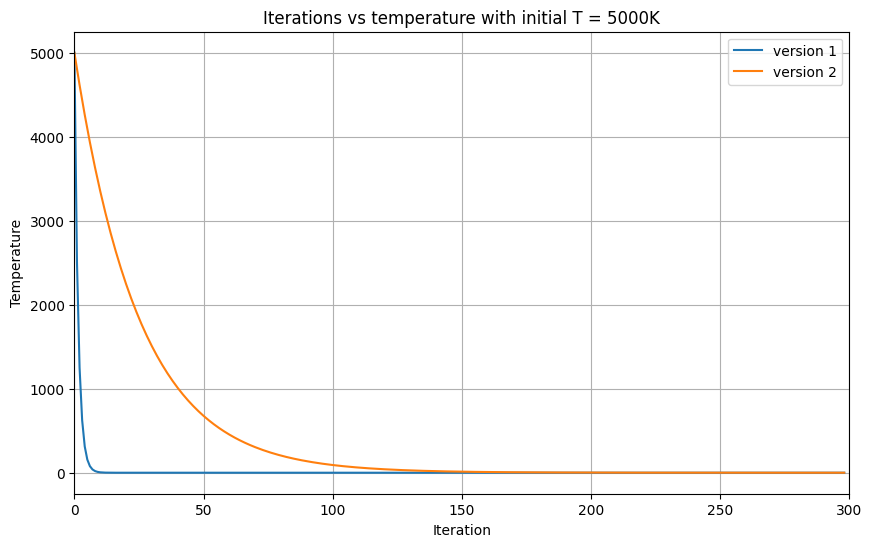

In [ ]:
temperature = 5000
no_of_iterations = 300
k = 0.5
x11, x21, iteration1, temp1, f_x_values_v1 = generate_accepted_states_v1(temperature, k, no_of_iterations)

k = 0.04
x12, x22, iteration2, temp2, f_x_values_v2 = generate_accepted_states_v2(temperature, k, no_of_iterations)

e1 = (f_x_values_v1[-1] - f_x_values_v2[-1])**2
print('Error between version 1 and version 2 = ', e1)

e21 = (f_x_values_v1[-1] - 2)**2
e22 = (f_x_values_v2[-1] - 2)**2
print('Error between version 1 and global minium = ', e21)
print('Error between version 2 and global minium = ', e22)
print()

# Plot for accepted states (iteration vs accepted states)
plt.figure(figsize=(10, 6))
plt.plot(temp1, label = 'version 1')
plt.plot(temp2, label = 'version 2')
plt.grid()
plt.xlim(0,300)
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title(f'Iterations vs temperature with initial T = {temperature}K')
plt.show()